                     # Raport Final de Vânzări
Acest raport prezintă analiza detaliată a datelor de vânzări, incluzând veniturile totale, cele mai bine vândute produse, distribuția vânzărilor pe categorii și analiza veniturilor lunare.


## Sumar
Raportul include următoarele secțiuni:
1. Venitul total generat din vânzări.
2. Produsele cele mai bine vândute.
3. Analiza vânzărilor lunare.
4. Distribuția vânzărilor pe categorii de produse.
5. Venitul mediu per produs.


In [15]:
import pandas as pd

# Înlocuiește calea cu locația exactă a fișierului tău CSV
file_path = r'E:\Python\Analyzing Historical Stock\Date vanzari fictive\DateVanzariFictive.csv'

# Încarcă fișierul CSV într-un DataFrame
data = pd.read_csv(file_path)

# Afișează primele 5 rânduri din setul de date
print(data.head())


   OrderID     Product     Category  Price  Quantity  OrderDaata  CostumerID  \
0     1001     Laptop   Electronics   1000         1  01/09/2023         101   
1     1002       Mouse  Electronics     25         2  02/09/2023         102   
2     1003       Phone  Electronics    600         1  03/09/2023         103   
3     1004      Tablet  Electronics    300         1  04/09/2023         104   
4     1005  HeadPhones  Accessories     50         3  05/09/2023         105   

   Revenue  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


Calcularea Veniturilor totale


In [17]:
# Afișează toate coloanele din DataFrame pentru a verifica dacă 'Revenue' există
print(data.columns)


Index(['OrderID', 'Product', 'Category', 'Price', 'Quantity', 'OrderDate',
       'CustomerID', 'Revenue'],
      dtype='object')


In [18]:
# Creează coloana 'Revenue' prin înmulțirea prețului (Price) cu cantitatea (Quantity)
data['Revenue'] = data['Price'] * data['Quantity']

# Afișează primele 5 rânduri pentru a verifica dacă 'Revenue' a fost calculat corect
print(data.head())


   OrderID     Product     Category  Price  Quantity   OrderDate  CustomerID  \
0     1001     Laptop   Electronics   1000         1  01/09/2023         101   
1     1002       Mouse  Electronics     25         2  02/09/2023         102   
2     1003       Phone  Electronics    600         1  03/09/2023         103   
3     1004      Tablet  Electronics    300         1  04/09/2023         104   
4     1005  HeadPhones  Accessories     50         3  05/09/2023         105   

   Revenue  
0     1000  
1       50  
2      600  
3      300  
4      150  


Venitul Total

In [19]:
# Calculează venitul total din toate comenzile
total_revenue = data['Revenue'].sum()

# Afișează venitul total
print(f"Venitul total este: {total_revenue}")


Venitul total este: 2560


Cele mai vandute produse

In [20]:
# Grupează datele pe produse și însumează cantitățile vândute
best_selling_products = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

# Afișează produsele cele mai bine vândute
print("Cele mai bine vândute produse:")
print(best_selling_products)


Cele mai bine vândute produse:
Product
HeadPhones    3
Monitor       2
Mouse         2
Charger       1
Laptop        1
Keybord       1
Phone         1
Tablet        1
Name: Quantity, dtype: int64


Analiza Vanzarilor Lunare 

In [21]:
# Convertim coloana OrderDate într-un format de dată
data['OrderDate'] = pd.to_datetime(data['OrderDate'], format='%d/%m/%Y')

# Extragem luna și anul din OrderDate
data['Month'] = data['OrderDate'].dt.to_period('M')

# Calculăm vânzările lunare
monthly_sales = data.groupby('Month')['Revenue'].sum()

# Afișează vânzările pe lună
print("Vânzările pe lună:")
print(monthly_sales)


Vânzările pe lună:
Month
2023-09    2560
Freq: M, Name: Revenue, dtype: int64


## Cele mai bine vândute produse
Graficul de mai jos prezintă cantitățile vândute pentru fiecare produs din portofoliu. Acest lucru ne permite să identificăm produsele cele mai populare.


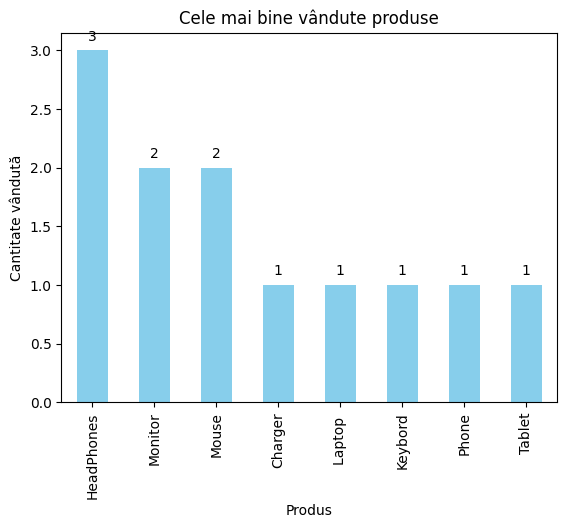

In [40]:
# Creăm un grafic pentru cele mai bine vândute produse
ax = best_selling_products.plot(kind='bar', color='skyblue')

# Titlu și etichete
plt.title('Cele mai bine vândute produse')
plt.xlabel('Produs')
plt.ylabel('Cantitate vândută')

# Adaugă etichete pe fiecare bară
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## Vânzările pe lună
Graficul de mai jos prezintă evoluția vânzărilor lunare, oferind o perspectivă asupra performanței pe termen lung și a posibilelor tendințe sezoniere.


In [24]:
# Verifică ce produse ai și cantitățile lor
print(best_selling_products)

# Verifică vânzările lunare
print(monthly_sales)


Product
HeadPhones    3
Monitor       2
Mouse         2
Charger       1
Laptop        1
Keybord       1
Phone         1
Tablet        1
Name: Quantity, dtype: int64
Month
2023-09    2560
Freq: M, Name: Revenue, dtype: int64


Pentru vânzările lunare

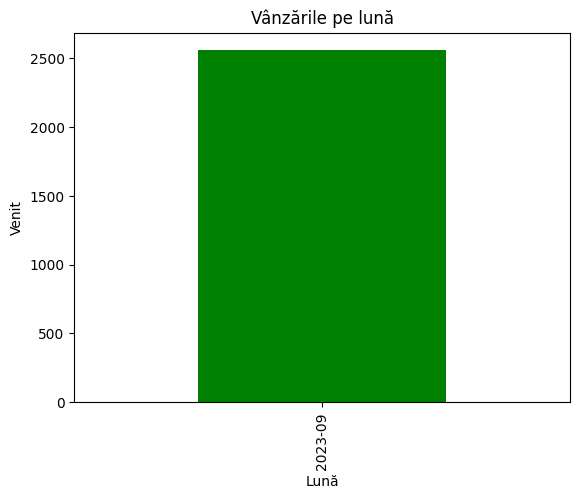

In [30]:
# Creează un grafic de tip bară pentru vânzările lunare
monthly_sales.plot(kind='bar', color='green')

# Adaugă titlu și etichete
plt.title('Vânzările pe lună')
plt.xlabel('Lună')
plt.ylabel('Venit')

# Afișează graficul
plt.show()


## Distribuția vânzărilor pe categorii
Graficul de mai jos prezintă distribuția vânzărilor pe categorii de produse, permițând identificarea celor mai populare categorii din portofoliu.


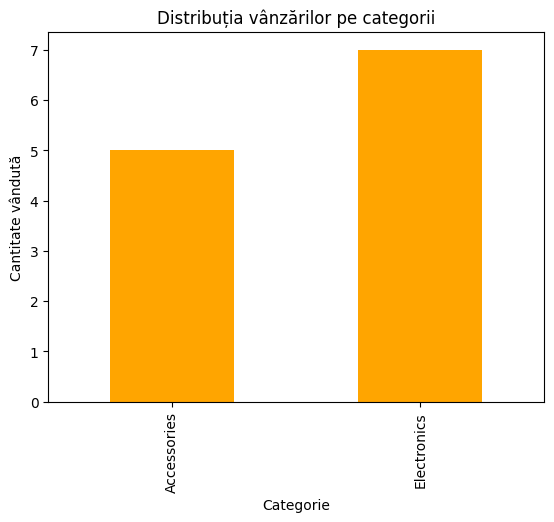

In [42]:
# Vizualizare distribuție pe categorii
category_distribution = data.groupby('Category')['Quantity'].sum()

# Grafic pe categorii
category_distribution.plot(kind='bar', color='orange')

plt.title('Distribuția vânzărilor pe categorii')
plt.xlabel('Categorie')
plt.ylabel('Cantitate vândută')
plt.show()


## Venitul mediu per produs
Graficul de mai jos arată venitul mediu generat de fiecare produs, oferind o imagine clară asupra performanței financiare a fiecărui articol din portofoliu.


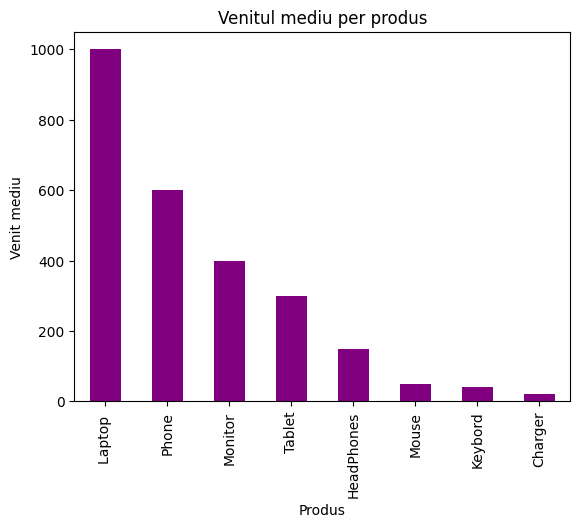

In [43]:
# Vizualizare venit mediu per produs
average_revenue_per_product.plot(kind='bar', color='purple')

plt.title('Venitul mediu per produs')
plt.xlabel('Produs')
plt.ylabel('Venit mediu')
plt.show()


Veniturile totale per categorie

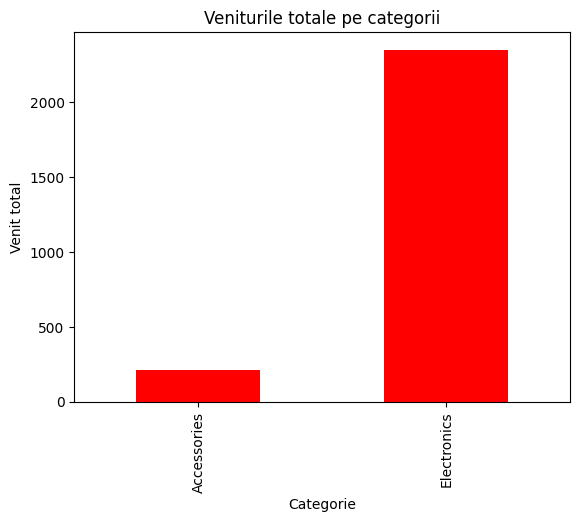

In [33]:
# Grupează datele pe categorii și calculează venitul total per categorie
revenue_per_category = data.groupby('Category')['Revenue'].sum()

# Creează un grafic de tip bară pentru veniturile per categorie
revenue_per_category.plot(kind='bar', color='red')

# Adaugă titlu și etichete
plt.title('Veniturile totale pe categorii')
plt.xlabel('Categorie')
plt.ylabel('Venit total')

# Afișează graficul
plt.show()


Analiza clienților
Numărul total de comenzi per client.
Venitul total generat de fiecare client.

Numărul total de comenzi per client:
CustomerID
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
dtype: int64
Venitul total per client:
CustomerID
101    1000
102      50
103     600
104     300
105     150
106      40
107     400
108      20
Name: Revenue, dtype: int64


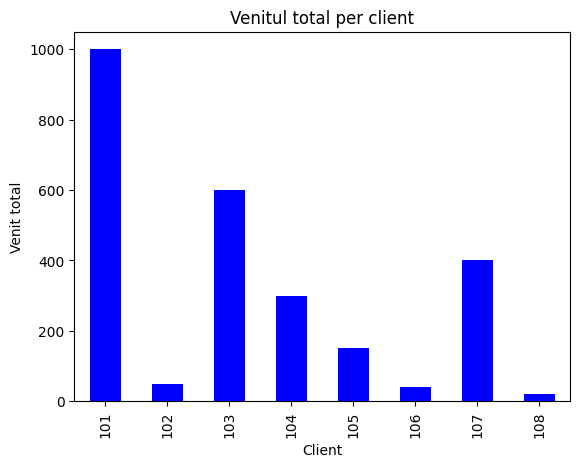

In [34]:
# Calculează numărul de comenzi per client
orders_per_customer = data.groupby('CustomerID').size()

# Afișează numărul de comenzi per client
print("Numărul total de comenzi per client:")
print(orders_per_customer)

# Calculează venitul total per client
revenue_per_customer = data.groupby('CustomerID')['Revenue'].sum()

# Afișează venitul total per client
print("Venitul total per client:")
print(revenue_per_customer)

# Vizualizare: Venitul total per client
revenue_per_customer.plot(kind='bar', color='blue')
plt.title('Venitul total per client')
plt.xlabel('Client')
plt.ylabel('Venit total')
plt.show()


## Concluzii
Acest raport a oferit o analiză detaliată a datelor de vânzări, incluzând veniturile totale, distribuția produselor vândute și performanțele fiecărei categorii. Pe baza acestui raport, putem observa că [concluzii cheie despre vânzări].
